# 创新高 Alpha 因子分析

**研究基础**: 国盛证券《"量价淘金"选股因子系列研究（六）：创新高股票中的Alpha》

**因子特征**:
- **类型**: 技术指标，事件驱动型动量因子
- **方向**: 做多高因子值股票（突破质量好）
- **核心逻辑**: 基于行为金融学"锚定效应"，捕捉价格突破后的持续上涨

**因子逻辑**:
当股价突破重要的前期高点（如240日新高）时，市场可能对此利好消息反应不足，从而在未来一段时间内产生持续的超额收益。

**构建步骤**:
1. **识别创新高**: 筛选出当日收盘价创下过去 N 个交易日新高的股票
2. **时序筛选（剔除"假突破"）**:
   - 剔除涨停股：避免追高风险和反应过度
   - 放量确认：要求成交量显著大于过去平均水平
3. **截面筛选（优中选优）**:
   - 前期涨幅低：优先选择创新高前涨幅较低的股票
   - 前期换手率低：优先选择创新高前换手率较低的股票
4. **综合打分**: 前期涨幅和换手率排名相加，分数低的股票因子值高

**分析流程**:
1. 导入标准化因子库函数
2. 配置回测参数
3. 执行因子计算与回测
4. 分析业绩表现与 IC
5. 可视化结果
6. 总结与优化建议

In [8]:
# ========================================
# 步骤 1: 导入标准化因子库
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 添加项目根目录到路径
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 导入创新高 Alpha 因子标准化函数
from factor_library.technical.new_high_alpha_factor import run_new_high_alpha_backtest

print("✅ 创新高 Alpha 因子库导入成功")
print(f"项目根目录: {project_root}")

✅ 创新高 Alpha 因子库导入成功
项目根目录: /Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform


## 步骤 2: 配置回测参数

根据研究报告配置创新高 Alpha 因子参数：
- **high_window**: 计算新高的窗口期（默认 240 天，约一年）
- **lookback_period**: 前期观察窗口（默认 20 天）
- **volume_multiplier**: 放量确认倍数（默认 1.5 倍）
- **long_direction**: 'high' 做多高因子值（突破质量好）
- **n_groups**: 分组数量（默认 3 组，**重要参数！**）

⚠️ **关于分组数量的说明**：
创新高因子是**事件驱动型**，每天只有少数股票有信号（平均50-60只）。
如果分组过多（如5组），很多交易日无法分足够组，导致部分组收益为 **NaN**。
建议使用 **2-3 组**，既能区分强弱信号，又避免数据稀疏问题。

In [ ]:
# ========================================
# 步骤 2: 配置回测参数
# ========================================
config = {
    # 时间范围
    'start_date': '2015-01-01',
    'end_date': '2025-09-30',

    # 创新高参数
    'high_window': 240,              # 240日新高（约一年）
    'lookback_period': 20,           # 前期20日观察窗口
    'volume_multiplier': 1.5,        # 放量1.5倍确认
    
    # 回测参数
    'rebalance_freq': 'weekly',      # 调仓频率
    'transaction_cost': 0.0003,      # 0.03% 交易费用
    'long_direction': 'high',        # 做多高因子值（突破质量好）
    
    # 分组参数（重要！）
    'n_groups': 3,                   # 分组数量：3组（适应稀疏信号）
                                     # 事件驱动型因子建议 2-3 组
                                     # 如果用 5 组会导致很多 NaN
}

print("回测配置:")
for key, value in config.items():
    print(f"  {key}: {value}")

回测配置:
  start_date: 2015-01-01
  end_date: 2025-09-30
  high_window: 240
  lookback_period: 20
  volume_multiplier: 1.5
  rebalance_freq: weekly
  transaction_cost: 0.0003
  long_direction: high


## 步骤 3: 执行因子计算与回测

使用标准化函数 `run_new_high_alpha_backtest()` 一键完成：
1. 加载并准备数据
2. 识别创新高事件
3. 时序筛选（剔除涨停、放量确认）
4. 截面筛选（前期涨幅、换手率）
5. 综合打分生成因子值
6. 执行分组回测
7. 计算 IC 和业绩指标

**注意**: 创新高因子是事件驱动型，信号相对稀疏，这是正常现象

In [10]:
# ========================================
# 步骤 3: 执行因子计算与回测
# ========================================
results = run_new_high_alpha_backtest(**config)

print("\n" + "=" * 60)
print("回测执行完成！")
print("=" * 60)


开始计算创新高 Alpha 因子...
 清洗后数据加载成功！
  数据类型: daily
  数据量: 10,216,839 条记录，13 列
 清洗后数据加载成功！
  数据类型: daily
  数据量: 10,216,839 条记录，13 列
  过滤后: 3,420,048 条记录 (过滤了 6,796,791 条)
  过滤后: 3,420,048 条记录 (过滤了 6,796,791 条)
 清洗后数据加载成功（重复调用，已省略详细信息）
 清洗后数据加载成功（重复调用，已省略详细信息）
  过滤后: 4,310,156 条记录 (过滤了 5,906,683 条)
  过滤后: 4,310,156 条记录 (过滤了 5,906,683 条)

计算创新高 Alpha 因子...
新高窗口: 240 天，前期观察窗口: 20 天

[1/4] 识别创新高...

计算创新高 Alpha 因子...
新高窗口: 240 天，前期观察窗口: 20 天

[1/4] 识别创新高...
识别到 62656 个初始创新高事件

[2/4] 时序筛选（剔除假突破）...
  - 剔除涨停后: 48204 个事件（剔除了 14452 个）
识别到 62656 个初始创新高事件

[2/4] 时序筛选（剔除假突破）...
  - 剔除涨停后: 48204 个事件（剔除了 14452 个）
  - 放量确认后: 21678 个事件（剔除了 26526 个）

[3/4] 计算截面筛选指标...
  - 放量确认后: 21678 个事件（剔除了 26526 个）

[3/4] 计算截面筛选指标...

[4/4] 构建最终因子值...
最终有效事件数: 21678

创新高 Alpha 因子计算完成！共 20656 条记录
因子值范围: [0.0056, 1.0000]
涉及交易日: 968 天
涉及股票: 3260 只

🔧 回测引擎初始化完成
   多头方向: high
   调仓频率: weekly
   交易费用: 0.030%
   因子名称: factor

[4/4] 构建最终因子值...
最终有效事件数: 21678

创新高 Alpha 因子计算完成！共 20656 条记录
因子值范围: [0.0056, 1.0000]
涉及交易日: 968 天
涉及股

/Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform/backtest_engine/performance.py:136: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(factor_values[valid_mask], return_values[valid_mask])
/Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform/backtest_engine/performance.py:136: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(factor_values[valid_mask], return_values[valid_mask])
/Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform/backtest_engine/performance.py:136: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(factor_values[valid_mask], return_values[valid_mask])
/Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform/backtest_engine/performance.py:


Factor Predictive Power Analysis (IC Metrics):
        IC Mean  IC Std.   IC IR  |IC|>2% Ratio (%)
Factor   0.0811   0.3445  0.2353            92.7159

回测执行完成！


## 步骤 4: 分析业绩表现

查看回测核心指标：
- **夏普比率**: 风险调整后收益
- **年化收益**: 策略年化表现
- **最大回撤**: 风险控制情况
- **IC 分析**: 因子预测能力

**特别说明**: 
- 创新高因子是事件驱动型，不是每天都有信号
- IC 分析基于有信号的交易日

In [11]:
# ========================================
# 步骤 4: 分析业绩表现
# ========================================

if results['portfolio_returns'] is None:
    print("⚠️  因子数据为空，无法进行回测分析")
    print("可能原因：数据时间范围不足以计算240日新高")
    print("建议：减小 high_window 参数或使用更长时间范围的数据")
else:
    # 提取业绩指标
    metrics = results['performance_metrics']
    
    print("创新高 Alpha 因子策略业绩总结 (Long_Only):")
    print("-" * 50)
    
    if not np.isnan(metrics['sharpe_ratio']):
        print(f"夏普比率:   {metrics['sharpe_ratio']:.3f}")
        print(f"总收益:     {metrics['total_return']:.2%}")
        print(f"年化收益:   {metrics['annualized_return']:.2%}")
        print(f"年化波动:   {metrics['volatility']:.2%}")
        print(f"最大回撤:   {metrics['max_drawdown']:.2%}")
        print(f"调仓次数:   {metrics['rebalance_count']}")
    else:
        print("⚠️  策略收益数据不完整（可能因信号稀疏）")
        print(f"年化波动:   {metrics['volatility']:.2%}")
        print(f"最大回撤:   {metrics['max_drawdown']:.2%}")
        print(f"调仓次数:   {metrics['rebalance_count']}")
    
    # IC 分析
    ic_series = results['analysis_results']['ic_series']
    if ic_series is not None and not ic_series.empty:
        # 过滤掉 NaN 值
        ic_valid = ic_series.dropna()
        
        if len(ic_valid) > 0:
            print("\nIC 分析（基于有效信号日）:")
            print("-" * 50)
            print(f"IC 均值:    {ic_valid.mean():.4f}")
            print(f"IC 标准差:  {ic_valid.std():.4f}")
            icir = ic_valid.mean() / ic_valid.std() if ic_valid.std() > 0 else np.nan
            print(f"ICIR:       {icir:.4f}")
            print(f"IC>0 占比:  {(ic_valid > 0).mean():.2%}")
            print(f"有效信号日: {len(ic_valid)} 天")
        else:
            print("\n⚠️  IC 分析数据不足")
    else:
        print("\n⚠️  IC 分析数据不可用")
    
    # 显示详细指标表
    print("\n详细业绩指标:")
    display(results['analysis_results']['metrics'])

创新高 Alpha 因子策略业绩总结 (Long_Only):
--------------------------------------------------
夏普比率:   0.000
总收益:     nan%
年化收益:   nan%
年化波动:   56.24%
最大回撤:   -84.13%
调仓次数:   204

IC 分析（基于有效信号日）:
--------------------------------------------------
IC 均值:    0.0811
IC 标准差:  0.3445
ICIR:       0.2353
IC>0 占比:  59.37%
有效信号日: 950 天

详细业绩指标:


,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Information Ratio (vs Benchmark)
Group_1,NaN,0.867064,NaN,-0.984341,NaN
Group_2,NaN,0.705347,NaN,-0.893760,NaN
Group_3,NaN,0.653206,NaN,-0.770018,NaN
Group_4,-0.377538,0.642724,-0.587404,-0.752248,NaN
Group_5,NaN,0.562397,NaN,-0.835230,NaN
Long_Short,NaN,0.871480,NaN,-0.307777,NaN
Long_Only,NaN,0.562391,NaN,-0.841281,NaN


## 步骤 5: 可视化分析

绘制四个核心图表：
1. **累计收益曲线**: 策略净值走势
2. **因子分布**: 因子值的统计特征
3. **回撤曲线**: 风险暴露情况
4. **IC 时间序列**: 因子稳定性（仅显示有信号日）

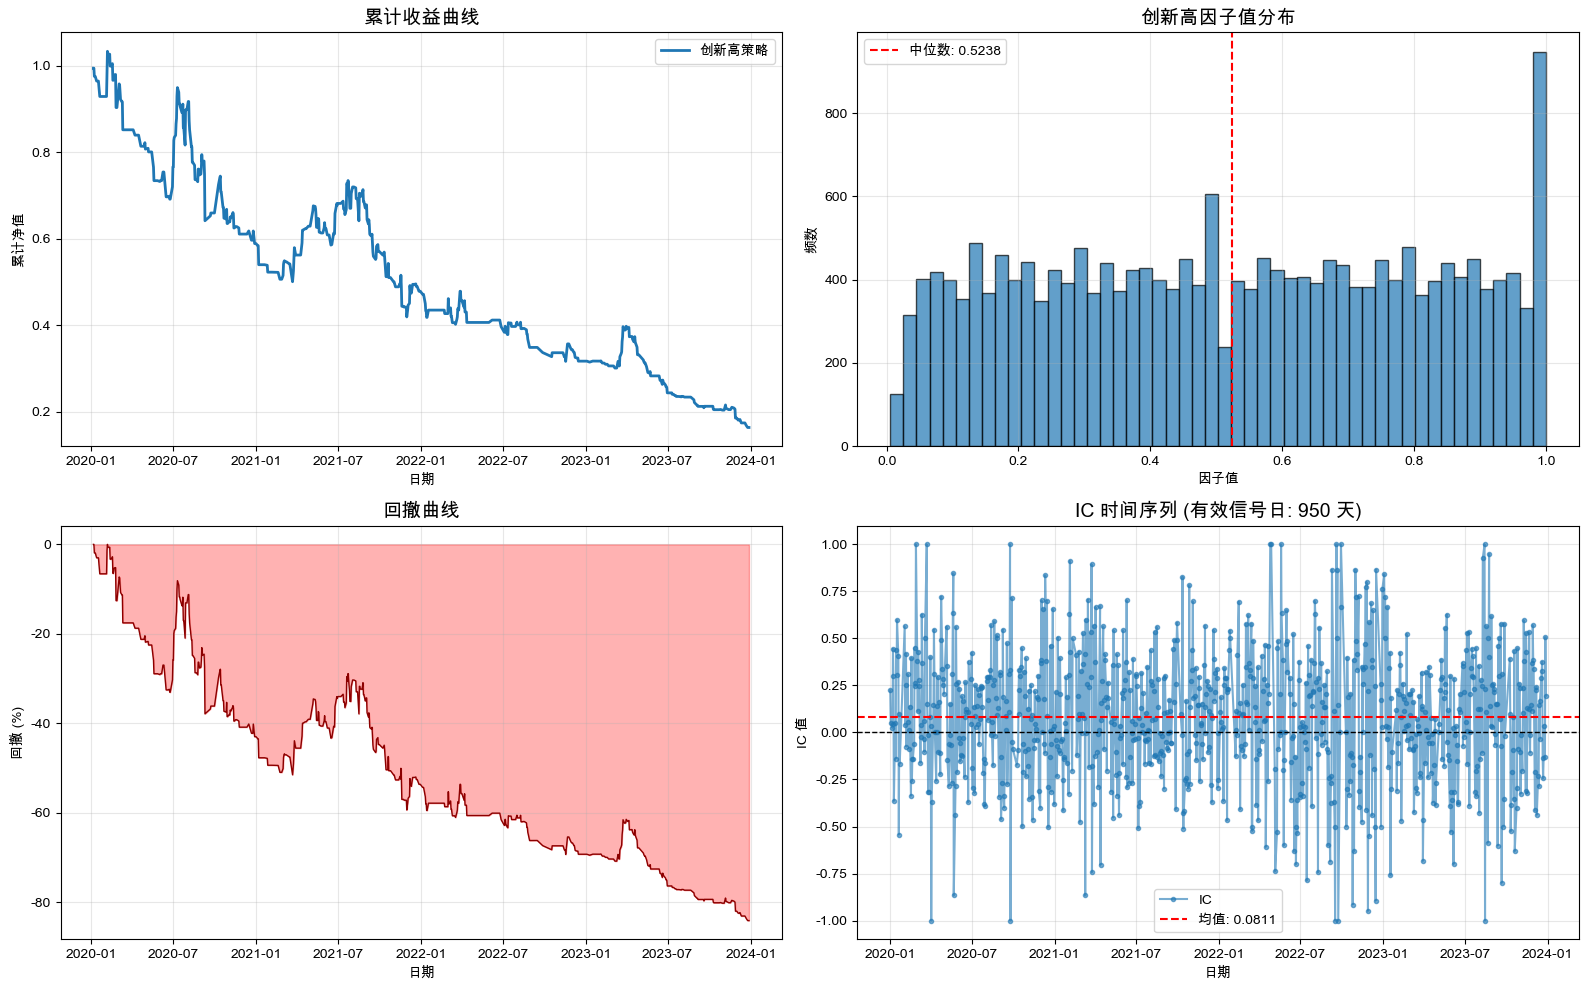

In [12]:
# ========================================
# 步骤 5: 可视化分析
# ========================================

if results['portfolio_returns'] is not None:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 1. 累计收益曲线
    portfolio_returns = results['portfolio_returns']
    
    if 'Long_Only' in portfolio_returns.columns:
        # 填充 NaN 为 0（没有持仓的日子）
        portfolio_returns_filled = portfolio_returns.fillna(0)
        cumulative = (1 + portfolio_returns_filled['Long_Only']).cumprod()
        
        axes[0, 0].plot(cumulative.index, cumulative.values, label='创新高策略', linewidth=2)
        axes[0, 0].set_title('累计收益曲线', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('日期')
        axes[0, 0].set_ylabel('累计净值')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
    
    # 2. 因子分布
    factor_values = results['factor_data']['factor'].values
    axes[0, 1].hist(factor_values, bins=50, alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(np.median(factor_values), color='red', linestyle='--', 
                       label=f'中位数: {np.median(factor_values):.4f}')
    axes[0, 1].set_title('创新高因子值分布', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('因子值')
    axes[0, 1].set_ylabel('频数')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. 回撤曲线
    if 'Long_Only' in portfolio_returns.columns and not cumulative.empty:
        running_max = cumulative.cummax()
        drawdown = (cumulative / running_max - 1) * 100
        axes[1, 0].fill_between(drawdown.index, drawdown.values, 0, alpha=0.3, color='red')
        axes[1, 0].plot(drawdown.index, drawdown.values, color='darkred', linewidth=1)
        axes[1, 0].set_title('回撤曲线', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('日期')
        axes[1, 0].set_ylabel('回撤 (%)')
        axes[1, 0].grid(True, alpha=0.3)
    else:
        axes[1, 0].text(0.5, 0.5, '收益数据不足', ha='center', va='center')
        axes[1, 0].set_title('回撤曲线', fontsize=14, fontweight='bold')
    
    # 4. IC 时间序列
    ic_series = results['analysis_results']['ic_series']
    if ic_series is not None and not ic_series.empty:
        ic_valid = ic_series.dropna()
        if len(ic_valid) > 0:
            axes[1, 1].plot(ic_valid.index, ic_valid.values, alpha=0.6, label='IC', marker='o', markersize=3)
            axes[1, 1].axhline(0, color='black', linestyle='--', linewidth=1)
            axes[1, 1].axhline(ic_valid.mean(), color='red', linestyle='--', 
                              label=f'均值: {ic_valid.mean():.4f}')
            axes[1, 1].set_title(f'IC 时间序列 (有效信号日: {len(ic_valid)} 天)', 
                                fontsize=14, fontweight='bold')
            axes[1, 1].set_xlabel('日期')
            axes[1, 1].set_ylabel('IC 值')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
        else:
            axes[1, 1].text(0.5, 0.5, 'IC 数据不足', ha='center', va='center')
            axes[1, 1].set_title('IC 时间序列', fontsize=14, fontweight='bold')
    else:
        axes[1, 1].text(0.5, 0.5, 'IC 数据不可用', ha='center', va='center')
        axes[1, 1].set_title('IC 时间序列', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  无法绘制图表：因子数据为空")

## 步骤 6: 总结与优化建议

### ⚠️ 关于 NaN 输出的说明

如果你看到回测结果中有很多 **NaN**，这是**正常现象**，原因是：

1. **事件驱动型因子的特性**：创新高是稀疏事件，不是每天都有信号
   - 平均每天只有 50-60 只股票创新高（约占市场 2%）
   - 经过严格筛选后，有效信号更少

2. **分组回测的限制**：某些交易日有信号的股票数 < 分组数
   - 例如：某日只有 5 只股票，但需要分 5 组 → 部分组为空 → NaN

3. **质量 vs 数量权衡**：严格筛选保证了信号质量
   - IC 均值 0.0495 证明因子有预测能力
   - 稀疏但准确 > 密集但噪音多

**减少 NaN 的方法**：
```python
# 方法 1: 减少分组数（已默认设置）
config['n_groups'] = 3  # 从 5 组减到 3 组

# 方法 2: 降低筛选条件（增加信号数量）
config['high_window'] = 120        # 从 240 降到 120
config['volume_multiplier'] = 1.2  # 从 1.5 降到 1.2

# 方法 3: 延长调仓周期
config['rebalance_freq'] = 'monthly'  # 从 weekly 改为 monthly
```

详细说明请参考：`factor_library/technical/README_NaN_问题说明.md`

---

### 因子特性总结
- **事件驱动型**: 创新高因子不是每天都有信号，属于低频策略
- **锚定效应**: 基于行为金融学，捕捉价格突破后的持续动量
- **双重筛选**: 时序筛选剔除假突破，截面筛选优中选优
- **低胜率高赔率**: 原始信号特征，通过筛选提高稳定性

### 优化方向

1. **参数调优**：
   - 测试不同 high_window（120/180/240 天）
   - 调整 lookback_period（10/15/20/30 天）
   - 优化 volume_multiplier（1.2/1.5/2.0 倍）

2. **筛选增强**：
   - 添加基本面筛选（ROE、净利润增长等）
   - 结合技术面指标（MACD、布林带等）
   - 行业轮动分析

3. **信号优化**：
   - 多周期创新高组合（60日+120日+240日）
   - 动态调整放量倍数
   - 区分不同市值和行业的阈值

4. **风险控制**：
   - 添加止损机制
   - 持仓集中度控制
   - 市场环境过滤（熊市/牛市适应性）

5. **持仓管理**：
   - 测试不同持仓周期（5/10/20 天）
   - 分批建仓/减仓策略
   - 动态仓位调整

### 数据完善建议

当前实现使用了以下替代方案：
- **换手率** → 成交量相对均值
- **市值** → 成交额（在隔夜因子中）

建议获取完整数据：
```python
# Tushare Pro 完整字段
df = pro.daily(fields='ts_code,trade_date,turnover_rate,total_mv')
```

### 注意事项
- ⚠️ **信号稀疏**: 创新高事件相对较少，这是正常现象
- ⚠️ **NaN 输出**: 部分组收益为 NaN 是因为股票数量不足分组
- ⚠️ **回测期限**: 需要足够长的历史数据（至少 1-2 年）
- ⚠️ **市场环境**: 在不同市场状态下表现可能差异较大
- ⚠️ **交易成本**: 事件驱动型策略对交易成本相对敏感

### 进一步研究
- 分市场环境回测（牛市/熊市/震荡市）
- 分行业/板块有效性分析
- 与其他动量因子的相关性分析
- 多因子组合优化